=== Core Analysis of Tesla's R&D Expenses ===
 R&D_Expense_Million YoY_Growth
Year  
2020 1,491 nan%
2021 2,593 73.9%
2022 3,075 18.6%
2023 3,969 29.1%
2024 4,540 14.4%


R&D's CAGR (2020-2024): 32.1%
Growth in 2024 (from financial reports): 571 millions
Growth in 2024 (from financial reports): 14.4%

=== Estimation of Investment in AI Projects Based on Finacial Report ===
Total Growth in R&D in 2024: 571 dollors in millions
Accordingly, in 2024, the additional investment brought by AI projects (including Optimus and Dojo) is approximately：
  conservative estimate (accounting for 60% of the total growth): 343 million
  positive estimate (accounting for 80% of the total growth): 457 million


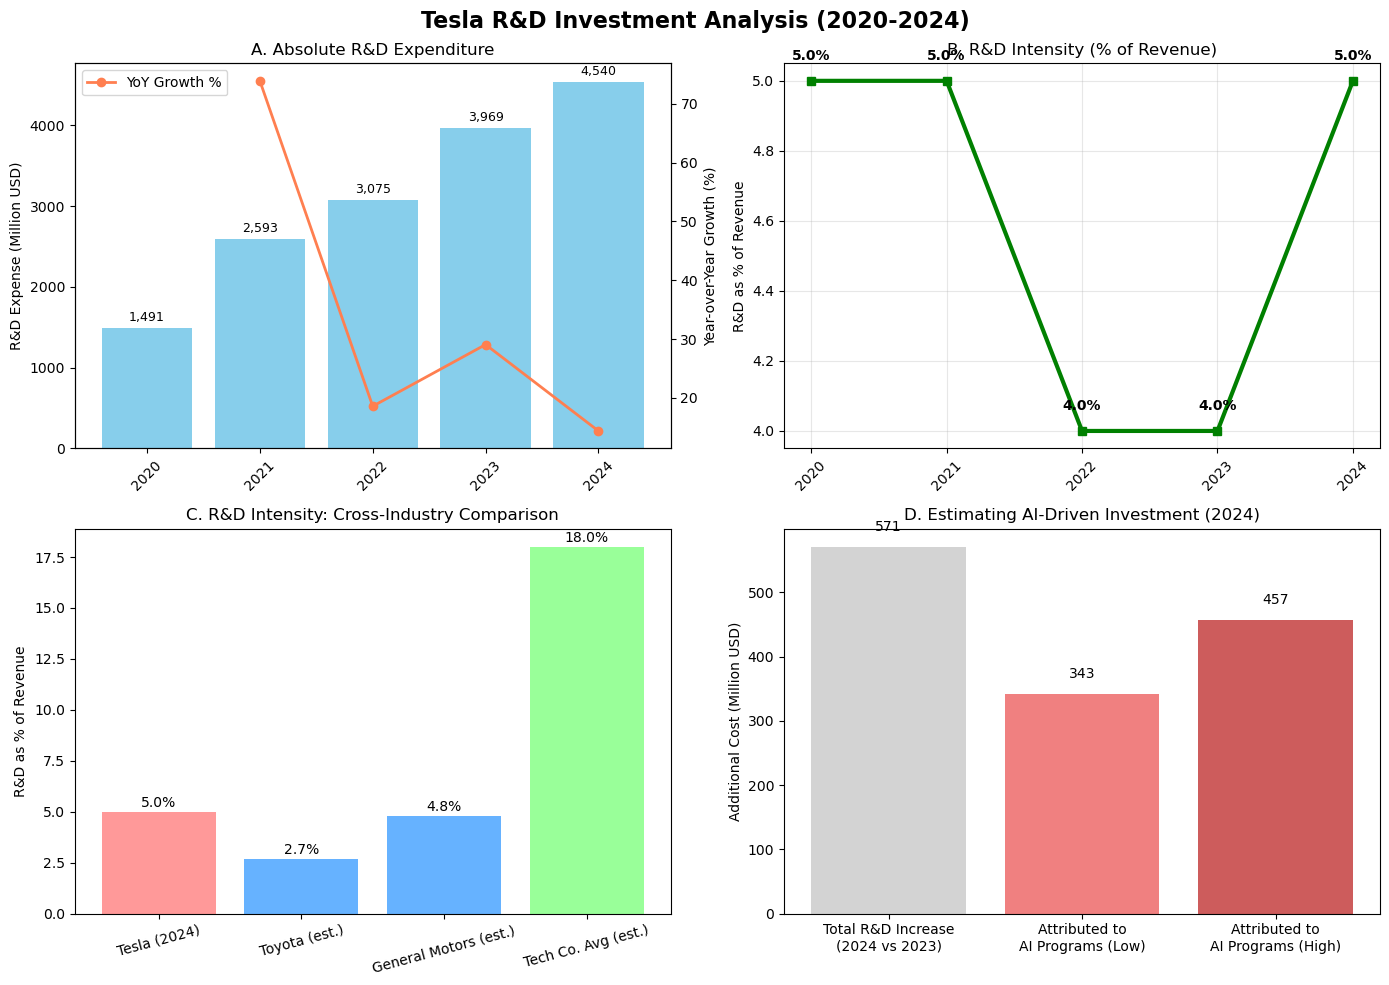

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load & prepare data
data = {
    'Year': [2024, 2023, 2022, 2021, 2020],
    'R&D_Expense_Million': [4540, 3969, 3075, 2593, 1491], # Dollars in millions
    'R&D_Percent_of_Revenue': [0.05, 0.04, 0.04, 0.05, 0.05]
}
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)
df.sort_index(inplace=True)

# 2. calculating key indicators
df['YoY_Growth'] = df['R&D_Expense_Million'].pct_change() * 100  # Year-over-year growth rate
df['CAGR'] = ((df.loc[2024, 'R&D_Expense_Million'] / df.loc[2020, 'R&D_Expense_Million']) ** (1/4) - 1) * 100
styled_df = df[['R&D_Expense_Million', 'YoY_Growth']].style.format({
    'R&D_Expense_Million': '{:,.0f}',  # Thousands separators, no decimal
    'YoY_Growth': '{:.1f}%'           # Keep one decimal place and add the percentage sign.
})

print("=== Core Analysis of Tesla's R&D Expenses ===")
print(styled_df.to_string()) 
print(f"\nR&D's CAGR (2020-2024): {df.loc[2024, 'CAGR']:.1f}%")  # CAGR = (Ending Value/Beginning Value)^(1/# of years)-1
print(f"Growth in 2024 (from financial reports): {df.loc[2024, 'R&D_Expense_Million'] - df.loc[2023, 'R&D_Expense_Million']:.0f} millions")
print(f"Growth in 2024 (from financial reports): {df.loc[2024, 'YoY_Growth']:.1f}%")

# 3. Make AI investment projections based on textual evidence
# Financial report text：“R&D expenses increased $571 million...primarily driven by additional costs...related to AI programs.”
growth_2024 = df.loc[2024, 'R&D_Expense_Million'] - df.loc[2023, 'R&D_Expense_Million']
print(f"\n=== Estimation of Investment in AI Projects Based on Finacial Report ===")
print(f"Total Growth in R&D in 2024: {growth_2024:.0f} dollors in millions")
# Suppose that the AI projects drive the major part of the growth.（e.g., 60%-80%）
ai_contribution_low = growth_2024 * 0.6
ai_contribution_high = growth_2024 * 0.8
print(f"Accordingly, in 2024, the additional investment brought by AI projects (including Optimus and Dojo) is approximately：")
print(f"  conservative estimate (accounting for 60% of the total growth): {ai_contribution_low:.0f} million")
print(f"  positive estimate (accounting for 80% of the total growth): {ai_contribution_high:.0f} million")

# 4. Draw group charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Tesla R&D Investment Analysis (2020-2024)', fontsize=16, fontweight='bold')

# Chart 1: Trend of absolute R&D Expenditure（bar + line）
ax1 = axes[0, 0]
bars = ax1.bar(df.index.astype(str), df['R&D_Expense_Million'], color='skyblue', label='R&D Expense')
ax1.set_ylabel('R&D Expense (Million USD)')
ax1.set_title('A. Absolute R&D Expenditure')
ax1.tick_params(axis='x', rotation=45)
# Add numerical labels above the columns
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=9)
# Add the growth line
line_ax = ax1.twinx()
line_ax.plot(df.index.astype(str), df['YoY_Growth'], color='coral', marker='o', linewidth=2, label='YoY Growth %')
line_ax.set_ylabel('Year-over-Year Growth (%)')
line_ax.legend(loc='upper left')

# Chart 2: The percentage of R&D expenses to revenue
ax2 = axes[0, 1]
ax2.plot(df.index.astype(str), df['R&D_Percent_of_Revenue']*100, color='green', marker='s', linewidth=3)
ax2.set_ylabel('R&D as % of Revenue')
ax2.set_title('B. R&D Intensity (% of Revenue)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)
# Add numerical labels
for x, y in zip(df.index.astype(str), df['R&D_Percent_of_Revenue']*100):
    ax2.text(x, y+0.05, f'{y:.1f}%', ha='center', va='bottom', fontweight='bold')

# Chart 3: Compare with the industry (assuming the data)
ax3 = axes[1, 0]
companies = ['Tesla (2024)', 'Toyota (est.)', 'General Motors (est.)', 'Tech Co. Avg (est.)']
rnd_intensity = [5.0, 2.7, 4.8, 18.0] # Sample data, Toyota/GE (from financial reports and NSF/BEA.)
colors = ['#FF9999', '#66B2FF', '#66B2FF', '#99FF99']
bars3 = ax3.bar(companies, rnd_intensity, color=colors)
ax3.set_ylabel('R&D as % of Revenue')
ax3.set_title('C. R&D Intensity: Cross-Industry Comparison')
ax3.tick_params(axis='x', rotation=15)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom')

# Chart 4：diagram showing the estimated addional investment for AI projects
ax4 = axes[1, 1]
categories = ['Total R&D Increase\n(2024 vs 2023)', 'Attributed to\nAI Programs (Low)', 'Attributed to\nAI Programs (High)']
values = [growth_2024, ai_contribution_low, ai_contribution_high]
colors4 = ['lightgray', 'lightcoral', 'indianred']
bars4 = ax4.bar(categories, values, color=colors4)
ax4.set_ylabel('Additional Cost (Million USD)')
ax4.set_title('D. Estimating AI-Driven Investment (2024)')
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()